# Tokenize full book

In [1]:
from transformers import GPT2Tokenizer

tokenizer = GPT2Tokenizer.from_pretrained('gpt2')

/home/ubuntu/miniconda3/envs/transformers-twiker/lib/python3.8/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [2]:
with open("data_files/full.txt", 'r') as fs:
    book_text = fs.read()

In [3]:
import numpy as np

book_tokens = np.array(tokenizer.tokenize(book_text))
book_ids = np.array(tokenizer.convert_tokens_to_ids(book_tokens))

In [4]:
# unique
book_ids_unique, index, counts = np.unique(book_ids, return_index=True, return_counts=True)
book_tokens_unique = book_tokens[index]

print("Total", len(book_ids))
print("Unique", len(book_ids_unique))

Total 11038208
Unique 32589


# For linguistic analysis, we need to add these properties to `book_ids_unique`:

* Counts of appearance: already found above
* Class as one of follows: noun, verb, adjective, ..., punctuation, affix, letter, num, other

In [5]:
def find_non_ascii_characters(input_string):
    non_ascii_characters = [char for char in input_string if ord(char) > 127]
    return np.unique(non_ascii_characters)

# Example usage
non_ascii_characters = find_non_ascii_characters(book_text)
print("Non-ASCII characters:", non_ascii_characters)

Non-ASCII characters: ['\xa0' '£' '·' 'º' 'Æ' 'É' 'à' 'á' 'â' 'ä' 'æ' 'ç' 'è' 'é' 'ê' 'ë' 'ì'
 'í' 'î' 'ï' 'ñ' 'ò' 'ó' 'ô' 'ö' 'ù' 'û' 'ü' 'ā' 'ě' 'ŏ' 'Œ' 'œ' 'Π' 'Τ'
 'ά' 'έ' 'ί' 'α' 'ε' 'η' 'ι' 'κ' 'λ' 'μ' 'ν' 'ξ' 'ο' 'π' 'ρ' 'ς' 'σ' 'τ'
 'φ' 'ω' 'ό' 'ἰ' 'ὁ' 'ὴ' '—' '‘' '’' '“' '”' '„']


In [6]:
import string
import spacy, nltk
from nltk.corpus import words

# punctuation
def is_punctuation(char):
    return char in string.punctuation or char in non_ascii_characters

# pos of word
nlp = spacy.load("en_core_web_sm")
def get_pos(word):
    doc = nlp(word)
    for token in doc:
        return token.pos_

# common word
nltk.download('words')
common_words = set(words.words())
def common_word(word):
    return word.lower() in common_words

[nltk_data] Downloading package words to /home/ubuntu/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [7]:
classes = []

for tok in book_tokens_unique:
    if len(tok) == 1:
        if is_punctuation(tok):
            classes.append("punctuation")
        elif tok.isalpha():
            classes.append("letter")
        elif tok.isdigit():
            classes.append("num")
        else:
            classes.append("other")
        continue
    
    if tok[0] != "Ġ":
        classes.append("affix")
        continue

    tok = tok[1:]
    if len(tok) == 1:
        if is_punctuation(tok):
            classes.append("punctuation")
            continue
        if tok.isalpha() and tok not in ["I", "a", "A"]:  # here we check single-char words
            classes.append("letter")
            continue
        elif tok.isdigit():
            classes.append("num")
            continue
    if not common_word(tok):
        classes.append("affix")
        continue
    classes.append(get_pos(tok).lower())
classes = np.array(classes)

In [8]:
# let's take a look
classes_unique = np.unique(classes)

for cls in classes_unique:
    print(cls, len(np.where(classes == cls)[0]))
    print(book_tokens_unique[classes == cls][:100])
    print()

adj 1766
['Ġpro' 'Ġother' 'Ġnew' 'Ġmany' 'Ġsuch' 'Ġown' 'Ġgood' 'Ġlast' 'ĠNew'
 'Ġsame' 'Ġhigh' 'ĠPro' 'Ġgreat' 'Ġreal' 'Ġpublic' 'Ġfew' 'Ġdifferent'
 'Ġbig' 'Ġbest' 'Ġlittle' 'Ġtri' 'Ġfull' 'Ġtop' 'Ġmain' 'Ġsmall' 'Ġide'
 'Ġcurrent' 'Ġold' 'Ġfree' 'Ġable' 'Ġleast' 'Ġlarge' 'Ġimportant' 'Ġclear'
 'Ġlight' 'Ġmajor' 'Ġavailable' 'Ġcertain' 'Ġpossible' 'Ġproper' 'Ġshort'
 'Ġseveral' 'Ġcomplete' 'Ġyoung' 'Ġlow' 'Ġant' 'Ġstrong' 'Ġsocial'
 'Ġparticular' 'Ġlocal' 'Ġpolitical' 'Ġformer' 'Ġkey' 'Ġspecial' 'Ġblack'
 'Ġsingle' 'Ġquick' 'Ġtrue' 'Ġbad' 'Ġsimilar' 'Ġentire' 'Ġspecific'
 'Ġprevious' 'Ġwhole' 'Ġcommon' 'Ġdue' 'Ġnational' 'Ġrecent' 'Ġgeneral'
 'ĠRed' 'Ġmass' 'ĠNational' 'Ġthird' 'Ġsignificant' 'Ġdifficult' 'Ġhigher'
 'Ġfinal' 'ĠSouth' 'Ġeasy' 'Ġpersonal' 'ĠBlack' 'ĠWhite' 'Ġdead' 'Ġwrong'
 'Ġoriginal' 'ĠGerman' 'Ġprim' 'Ġsoft' 'Ġserious' 'Ġlegal' 'Ġill'
 'Ġaverage' 'Ġperfect' 'Ġsimple' 'Ġprivate' 'Ġworth' 'Ġselect' 'Ġcandid'
 'Ġpopular' 'Ġvarious']

adp 111
['Ġof' 'Ġin' 'Ġon' 'Ġfor' '

In [9]:
# this looks reasonable, but classes are too many
# so we select the most meaningful ones
super_classes = ["adj", "adp", "adv", "aux", "verb", "cconj", "noun", "pron", "sconj", "verb"]

# show some stats
class_counts_unique = []
class_counts_total = []

for cls in super_classes:
    idx = np.where(classes == cls)[0]
    class_counts_unique.append(len(idx))
    class_counts_total.append(counts[idx].sum())

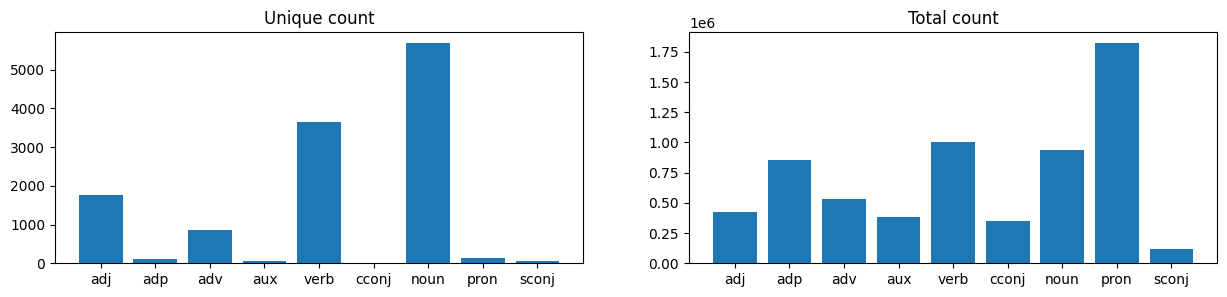

In [10]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(15, 3))
ax[0].bar(super_classes, class_counts_unique)
ax[0].set_title("Unique count")
ax[1].bar(super_classes, class_counts_total)
ax[1].set_title("Total count")
plt.show()

# Summary

In [11]:
# use `book_ids_unique` to retrieve kernels from trained model
print(len(book_ids_unique), book_ids_unique)

# use `book_tokens_unique` to see word
print(len(book_tokens_unique), book_tokens_unique)

# use `counts` to filter out low-frequency tokens
print(len(counts), counts)

# use `classes` to find the type of words
print(len(classes), classes)

32589 [    0     1     2 ... 50251 50254 50255]
32589 ['!' '"' '#' ... 'ominated' 'Ġinformants' 'Ġgazed']
32589 [41131  2790     2 ...    45     1   252]
32589 ['punctuation' 'punctuation' 'punctuation' ... 'affix' 'affix' 'affix']


# Analysis

In [12]:
import torch
from transformers import GPT2LMHeadModel
import json

In [13]:
# Specify the path to the checkpoint file
checkpoint_path = '../../results/gpt2/dikens/train_twiker'

# Specify key or value
analyze_value = True

In [14]:
# load config
with open(f'{checkpoint_path}/config.json', 'r') as file:
    config = json.load(file)

# Load the model with the checkpoint
model = GPT2LMHeadModel.from_pretrained(checkpoint_path)

# weight
embedding_weights = model.transformer.twiker_model.embedding.weight.detach()

# reshape
n_head = 1 if config["twiker_head_invariant"] else config["n_head"]
n_layer = 1 if config["twiker_layer_invariant"] or config["twiker_only_first_layer"] else config["n_layer"]
embedding_weights = embedding_weights.reshape(-1, n_layer, 2, n_head, config["twiker_kernel_size"])

# soft max
embedding_weights = torch.softmax(embedding_weights / 0.4, dim=-1)

# mean over head and layer
embedding_weights = embedding_weights.mean(dim=1).mean(dim=2)

# extract for book
embedding_weights = embedding_weights[book_ids_unique]

# extract for value
wv = embedding_weights[:, 1, :] if analyze_value else embedding_weights[:, 0, :]
print(wv.shape)

torch.Size([32589, 3])


In [15]:
# compute distance
t010 = torch.zeros(config["twiker_kernel_size"])
t010[config["twiker_kernel_size"] // 2] = 1.
dist010 = torch.norm(wv - t010, dim=1)

### Filter by `counts`

In [16]:
filter = counts >= 5

book_ids_counts = book_ids_unique[filter]
book_tokens_counts = book_tokens_unique[filter]
classes_counts = classes[filter]
dist010_counts = dist010[filter]

print(len(dist010_counts))

24450


In [17]:
# statistics on all

argsort = torch.argsort(dist010_counts, descending=True)
book_tokens_counts[argsort[:100]]

array(['Ġdesirable', 'Ġpositively', 'usky', 'ags', 'Ġvague', 'Ġintense',
       'ĠTwist', 'Ġmoderate', 'Ġrightly', 'Ġkindred', 'Ġadditional',
       'Ġprematurely', 'Ġabsolute', 'inary', 'Ġinfinite', 'Ġcasual',
       'Ġfully', 'Ġstartled', 'Ġlame', 'ateful', 'iled', 'Nor',
       'Ġreflected', 'Ġcontradictory', 'aff', 'Ġadjacent', 'eping',
       'acious', 'Ġexalted', 'Ġpaternal', 'atory', 'Ġretiring', 'Ġbrutal',
       'Ġelastic', 'Ġamusing', 'Ġformally', 'Ġpromptly', 'ounded',
       'Ġoriginal', 'Ġsturdy', 'Ġaccidentally', 'Ġpalpable',
       'Ġtriumphant', 'Ġforce', 'Ġexclusive', 'Ġcrawling', 'Fine',
       'Ġexciting', 'Ġgravity', 'Ġhumorous', 'ĠPork', 'Ġvisitor', 'Ġodds',
       'Ġgradual', 'ilt', 'Ġfo', 'und', 'Ġimposing', 'bled', 'bered',
       'Ġremaining', 'ĠManager', 'Ġrival', 'Ġimpressive', 'Ġlent',
       'Ġfrantic', 'Ġquantity', 'Ġwhence', 'ald', 'Ġcrop', 'Ġhorribly',
       'Ġgross', 'Ġassistance', 'Ġassert', 'Ġrefreshing', 'Ġwilling',
       'Ġsubstantial', 'Ġwinding'

### Filter by `class`

In [18]:
# statistics on role

cls_mean = []
for cls in super_classes:
    filter = (classes_counts == cls)
    book_ids_cls = book_ids_counts[filter]
    book_tokens_cls = book_tokens_counts[filter]
    dist010_cls = dist010_counts[filter]
    mean = dist010_cls.mean()
    cls_mean.append(mean)

<BarContainer object of 10 artists>

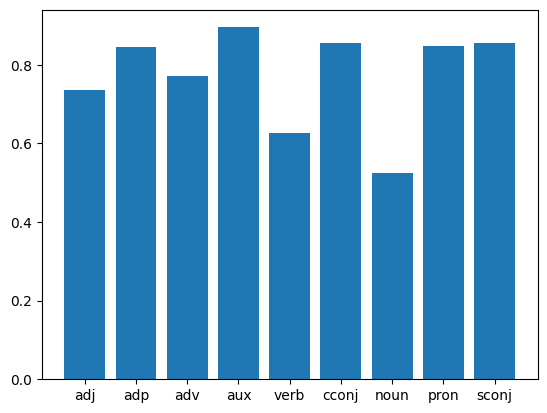

In [19]:
plt.bar(super_classes, cls_mean)
